In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE,RFECV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score #Metrics for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
g_data = pd.read_csv('data1.csv')

In [4]:
g_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
g_data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

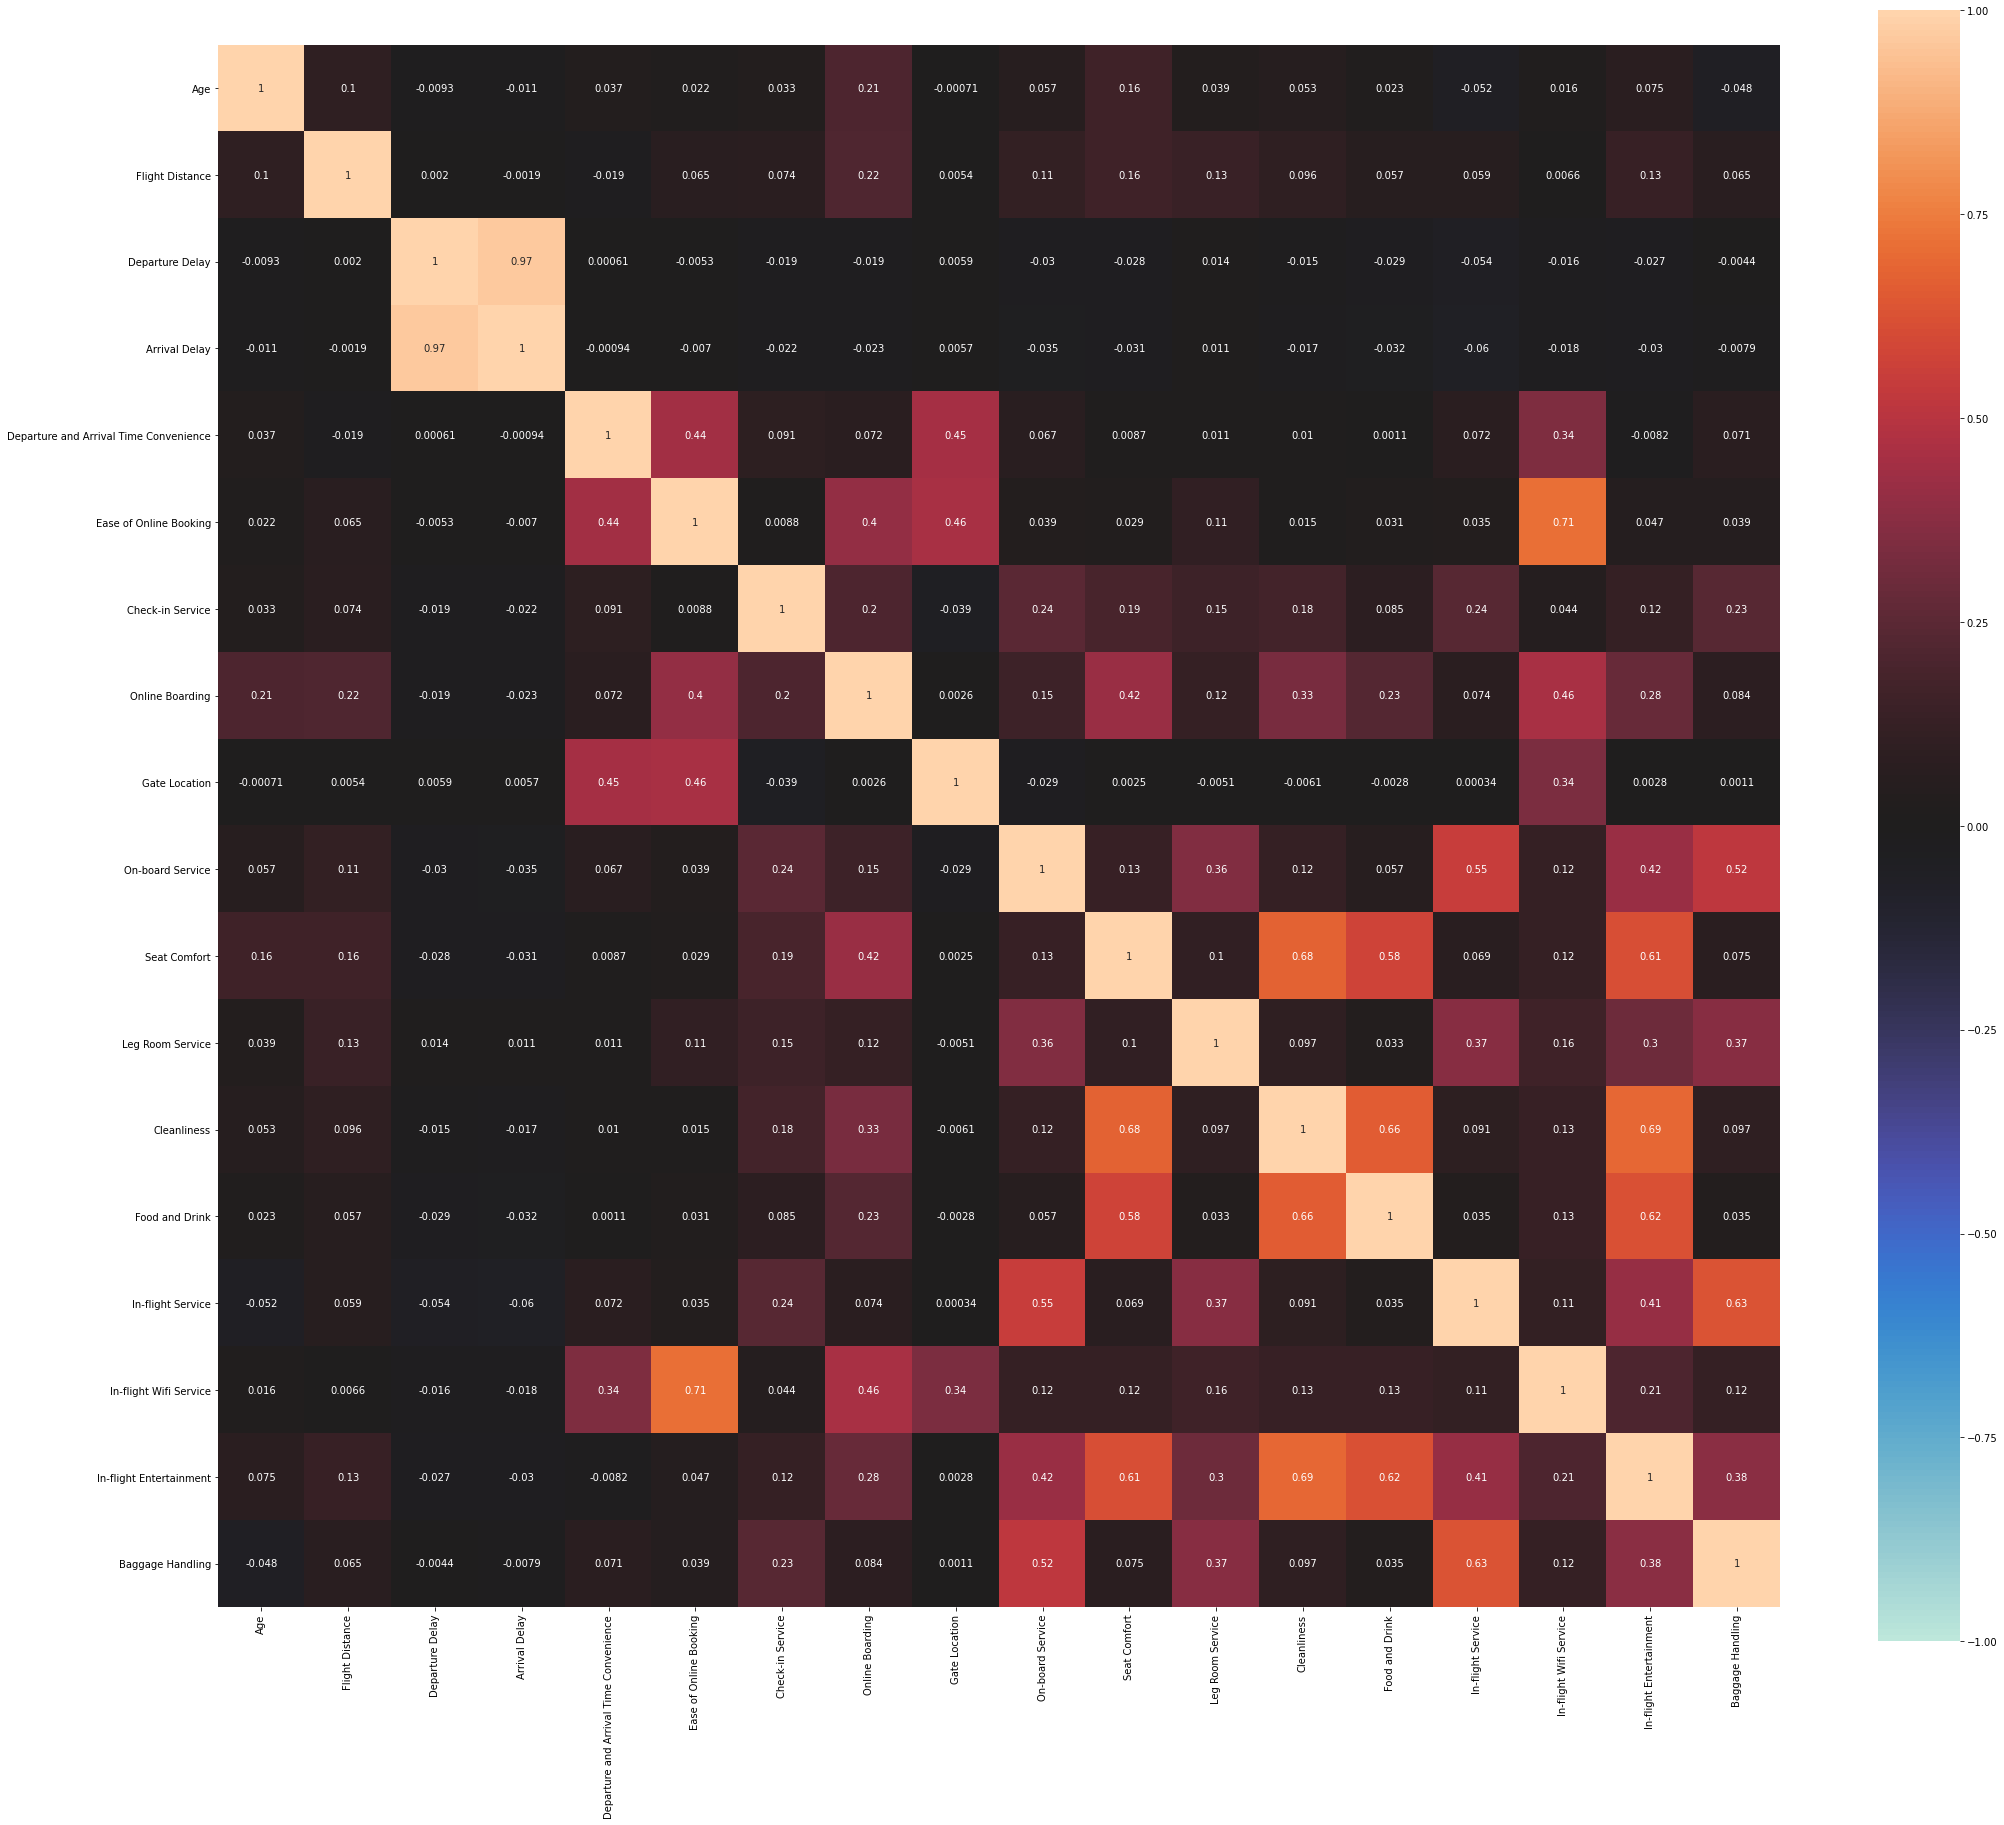

In [144]:
plt.figure(figsize = (35,30))
hmap=sns.heatmap(g_data[['Age',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].corr(),annot=True,square=True,cmap="icefire",vmin=-1,vmax=1)


#### Creating Dummy Variables

In [6]:
data=pd.get_dummies(g_data, drop_first=True)
data.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,48,821,2,5,3,3,4,3,3,...,5,3,5,5,1,0,0,0,0,0
1,2,35,821,26,39,2,2,3,5,2,...,5,2,5,5,0,1,0,0,0,1
2,3,41,853,0,0,4,4,4,5,4,...,3,4,3,3,1,1,0,0,0,1
3,4,50,1905,0,0,2,2,3,4,2,...,5,2,5,5,1,1,0,0,0,1
4,5,49,3470,0,1,3,3,3,5,3,...,3,3,3,3,0,1,0,0,0,1


In [7]:
data.columns

Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Gender_Male',
       'Customer Type_Returning', 'Type of Travel_Personal', 'Class_Economy',
       'Class_Economy Plus', 'Satisfaction_Satisfied'],
      dtype='object')

#### Model Selection

In [8]:
X=data.iloc[:,:24]
Y=data.iloc[:,24]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

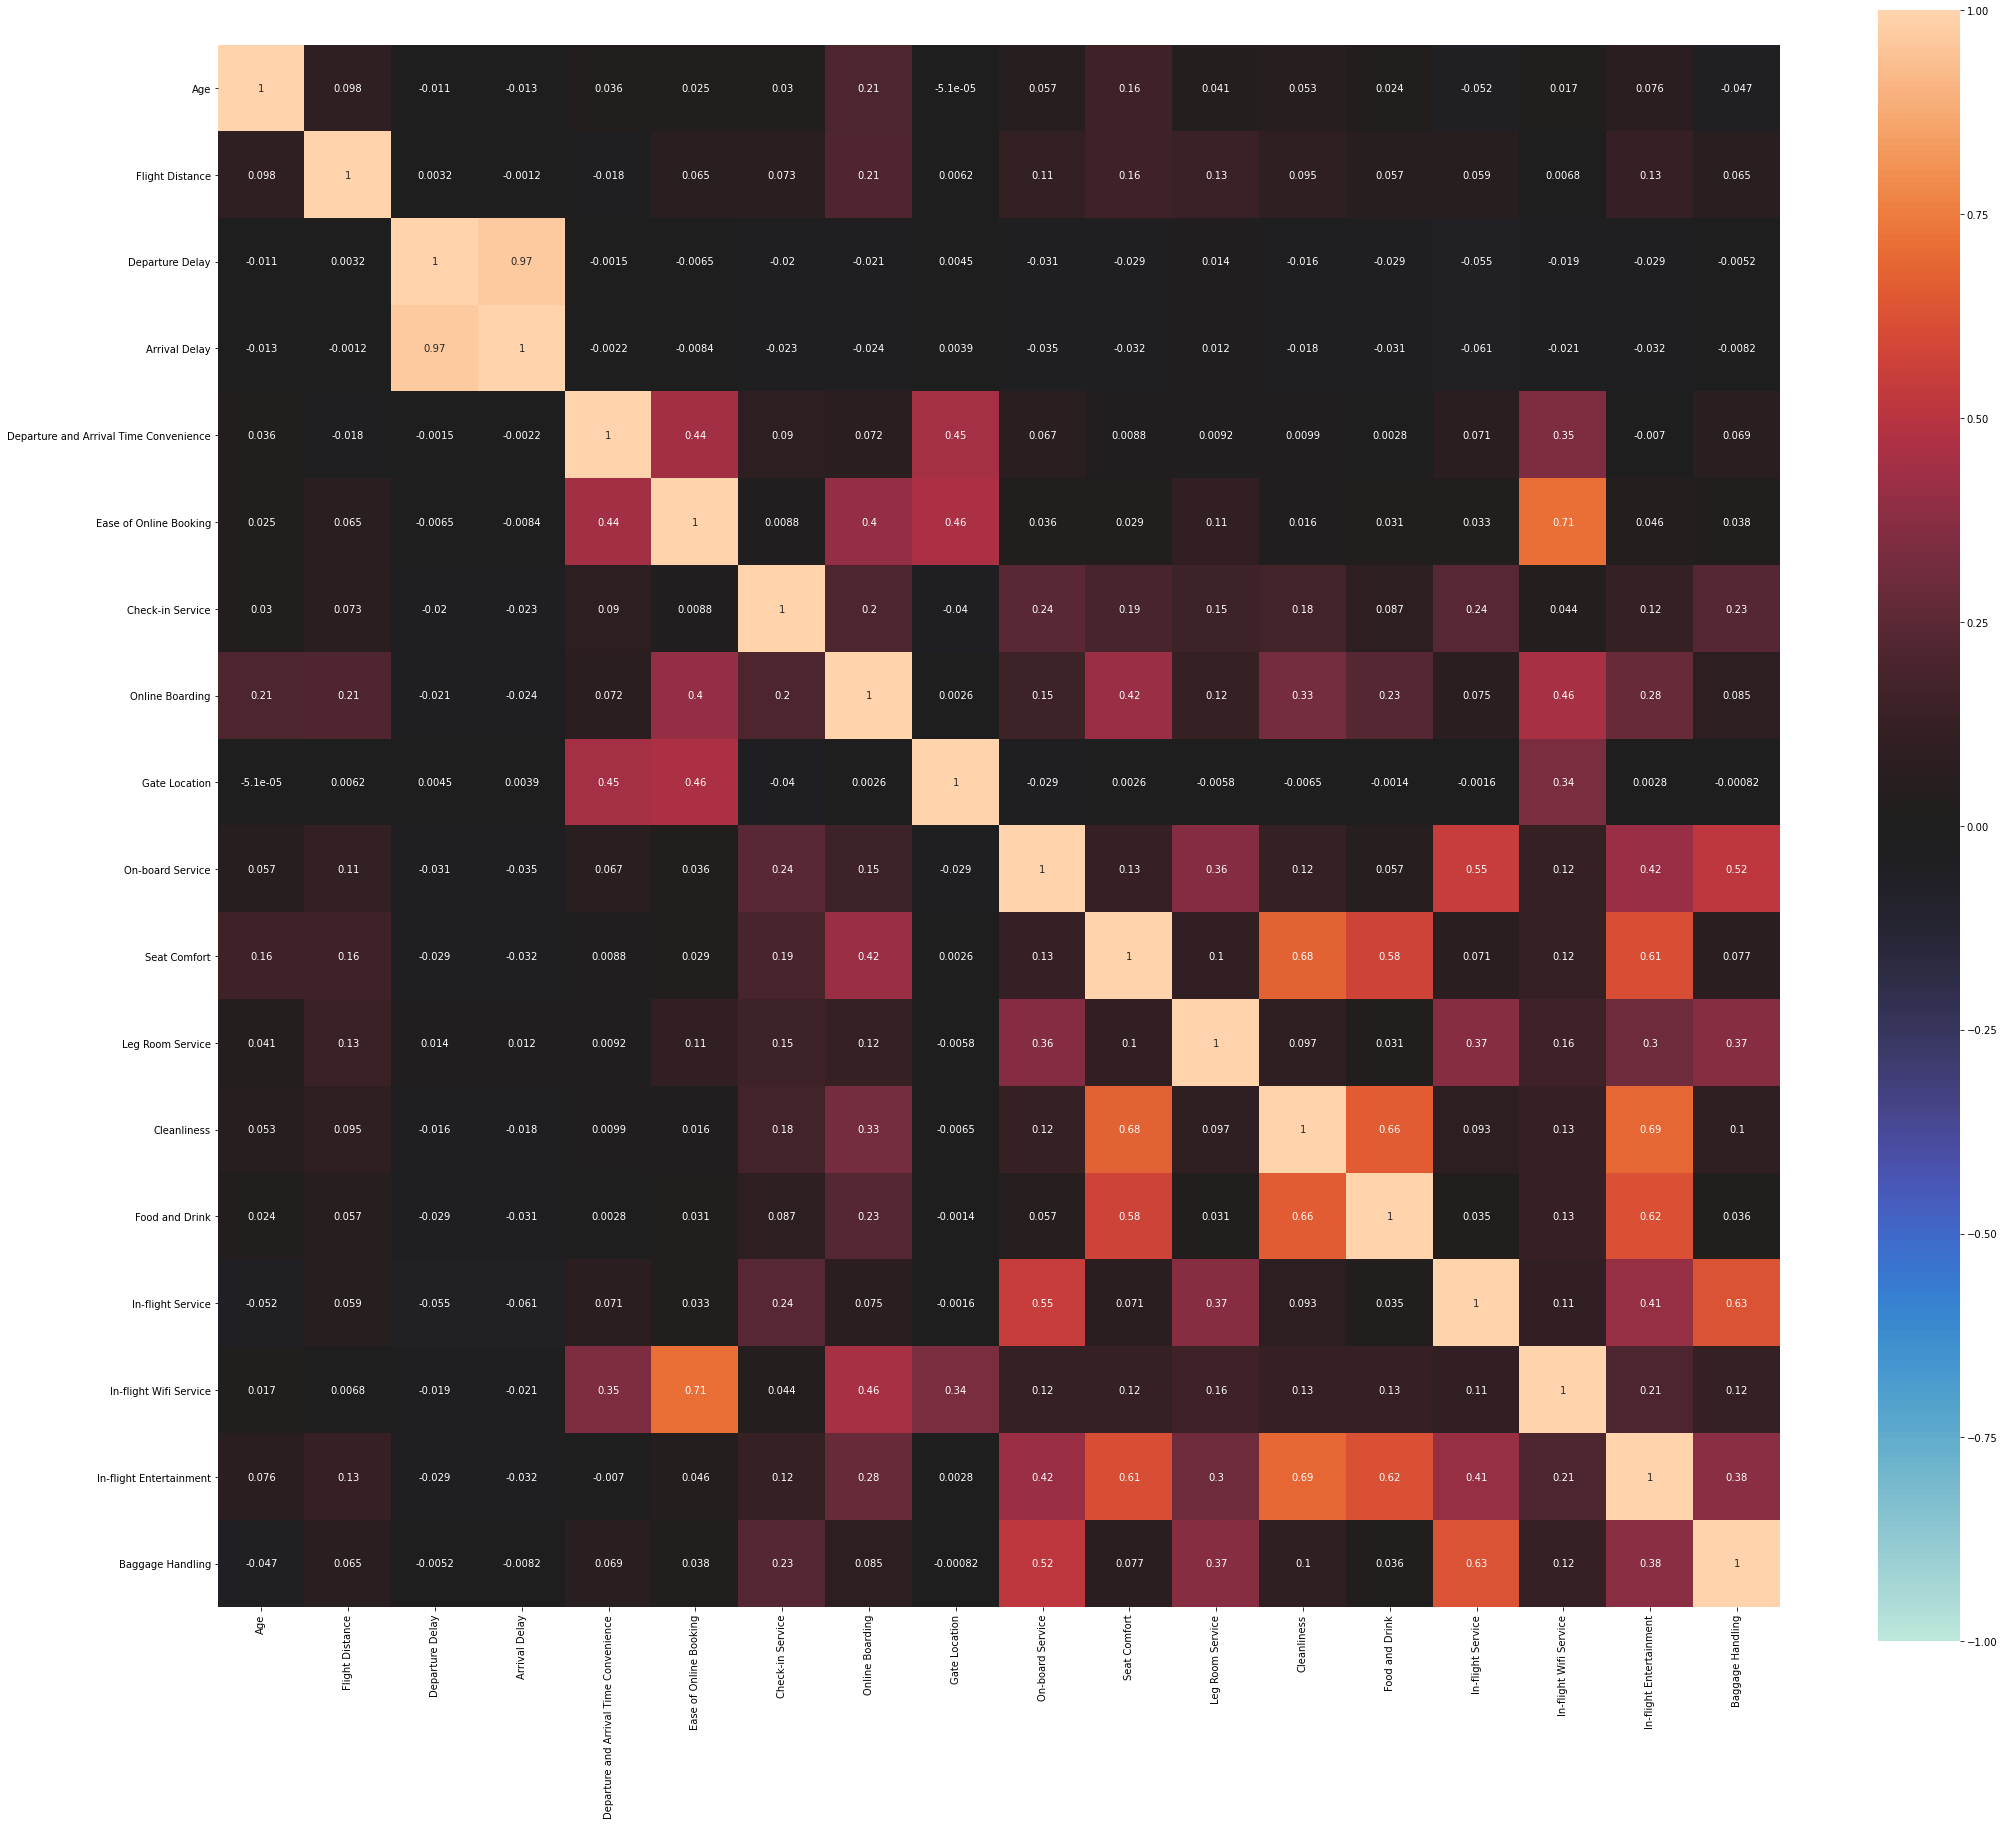

In [10]:
plt.figure(figsize = (35,30))
hmap=sns.heatmap(x_train[['Age',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].corr(),annot=True,square=True,cmap="icefire",vmin=-1,vmax=1)


In [210]:
ref=RFECV(estimator=LogisticRegression(),min_features_to_select=2)

In [211]:
model=ref.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [212]:
model.support_

array([False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [213]:
model.ranking_

array([10,  4,  9,  8,  7,  1,  1,  1,  1,  2,  1,  5,  1,  1,  3,  1,  1,
        1,  6,  1,  1,  1,  1,  1])

#### Logistic Regression 

In [164]:
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [10]:
fit_x=x_train[['Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service','Online Boarding','On-board Service', 'Leg Room Service', 'Cleanliness','In-flight Service','In-flight Wifi Service','In-flight Entertainment','Gender_Male','Customer Type_Returning','Type of Travel_Personal','Class_Economy','Class_Economy Plus']]

fit_y=y_train

x_test_fit = x_test[['Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service','Online Boarding','On-board Service', 'Leg Room Service', 'Cleanliness','In-flight Service','In-flight Wifi Service','In-flight Entertainment','Gender_Male','Customer Type_Returning','Type of Travel_Personal','Class_Economy','Class_Economy Plus']]

In [11]:
LR=LogisticRegression()

In [12]:
LR.fit(fit_x,fit_y)

LogisticRegression()

In [13]:
LR.coef_

array([[-0.12311573, -0.13820771,  0.33240462,  0.59572626,  0.31832882,
         0.25006928,  0.23345395,  0.1903167 ,  0.41027576,  0.08358501,
         0.07356658,  1.88603465, -2.66679345, -0.7291348 , -0.81774577]])

In [14]:
LR.intercept_

array([-7.9259433])

In [30]:
p=LR.predict_proba(fit_x)
len(p)

103589

#### train test accuracy

In [11]:
y_pred = LR.predict(fit_x)
confusion_matrix(fit_y,y_pred)

array([[52687,  5793],
       [ 7390, 37719]], dtype=int64)

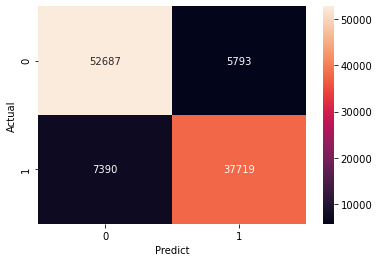

In [12]:
sns.heatmap(confusion_matrix(fit_y,y_pred),annot=True,fmt='g')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [15]:
tn,fp,fn,tp=confusion_matrix(fit_y,y_pred).ravel()
accuracy=(np.diag(confusion_matrix(fit_y,y_pred))).sum()/len(fit_y)
accuracy

0.8727374528183495

In [16]:
y_pred_tr_probs = LR.predict_proba(fit_x)
y_pred_tr__probs

array([[0.06018379, 0.93981621],
       [0.04784949, 0.95215051],
       [0.91311788, 0.08688212],
       ...,
       [0.89166168, 0.10833832],
       [0.05304233, 0.94695767],
       [0.71333623, 0.28666377]])

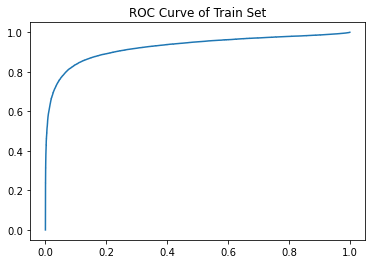

In [17]:
y_pred_tr_probs=LR.predict_proba(fit_x)
fpr,tpr,_ = roc_curve(y_train,y_pred_tr_probs[:,1])
plt.plot(fpr,tpr)
plt.title('ROC Curve of Train Set')
plt.show()

In [18]:
auc = roc_auc_score(y_train, y_pred_tr_probs[:,1])
auc

0.9254494029722018

#### test set accuracy

In [19]:
y_pred = LR.predict(x_test_fit)
confusion_matrix(y_test,y_pred)

array([[13321,  1424],
       [ 1817,  9336]], dtype=int64)

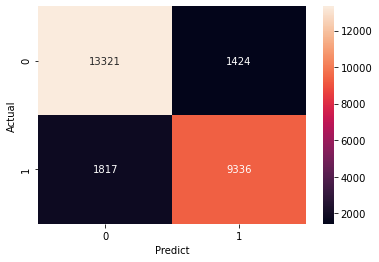

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [22]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
accuracy=(np.diag(confusion_matrix(y_test,y_pred))).sum()/len(y_test)
accuracy

0.8748552011738359

In [24]:
y_pred_te_probs =LR.predict_proba(x_test_fit)
y_pred_te_probs

array([[0.94866177, 0.05133823],
       [0.9213413 , 0.0786587 ],
       [0.03875892, 0.96124108],
       ...,
       [0.03357787, 0.96642213],
       [0.01305743, 0.98694257],
       [0.04845689, 0.95154311]])

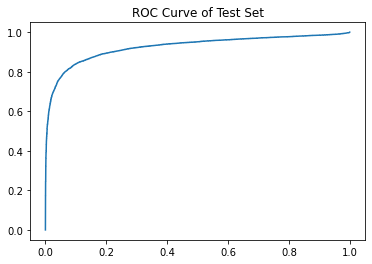

In [26]:
y_pred_te_probs=LR.predict_proba(x_test_fit)
fpr,tpr,_ = roc_curve(y_test,y_pred_te_probs[:,1])
plt.plot(fpr,tpr)
plt.title('ROC Curve of Test Set')
plt.show()

In [27]:
auc = roc_auc_score(y_test, y_pred_te_probs[:,1])
auc

0.9259956028843487

### Extra Work

#### Naive Bayes 

In [204]:
nb=GaussianNB()

In [205]:
nb.fit(x_train,y_train)

GaussianNB()

In [202]:
y_predNB=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.8748552011738359

In [203]:
confusion_matrix(y_test,y_pred)

array([[13321,  1424],
       [ 1817,  9336]], dtype=int64)

#### support Vector Classification (SVC)

In [28]:
rfe_SVC=RFE(estimator=SVC(kernel="linear",C=1),n_features_to_select=3)

In [ ]:
model_SVC=rfe_SVC.fit(x_train,y_train)

In [ ]:
rfe_SVC.support_

In [ ]:
rfe_SVC.ranking_